In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import scipy.stats as sts
import seaborn as sn
from scipy.special import chdtri

In [2]:
data = np.genfromtxt('lab1.csv', delimiter=',', dtype=float)

In [3]:
median = st.median(data)
mean = st.mean(data)
std = st.stdev(data)
print(f'Median - {median}')
print(f'Mean - {mean}')
print(f'Std - {std}')

Median - 60.0
Mean - 60.04635761589404
Std - 6.013647544430045


In [4]:
def interval_expected_value(input_data, gamma):
    n = len(input_data)
    mean = st.mean(input_data)
    variance = st.variance(input_data) * n / (n-1)
    std = st.stdev(input_data) * n / (n-1)
    
    t = sts.t.ppf((1 + gamma)/2 , n-1)
    left_bound = np.round(mean - (t * std / np.sqrt(n)),3)
    right_bound = np.round(mean + (t * std / np.sqrt(n)),3)
    
    return left_bound, right_bound

In [5]:
left_bound, right_bound = interval_expected_value(data, 0.95)
print(f'{left_bound} < MX < {right_bound}')

59.363 < MX < 60.73


In [6]:
def interval_standart_deviation(input_data, gamma):
    n = len(input_data)
    k = n - 1
    std = st.stdev(input_data) * n / (n-1)
    
    alpha_1 = (1 - gamma) / 2
    alpha_2 = (1 + gamma) / 2
    chi_squere_1 = chdtri(k, alpha_1)
    chi_squere_2 = chdtri(k, alpha_2)
    left_bound = std * np.sqrt((n - 1)/chi_squere_1)
    right_bound = std * np.sqrt((n - 1)/chi_squere_2)
    
    return left_bound, right_bound

    

In [7]:
left_bound, right_bound = interval_standart_deviation(data,0.95)

print(f'{np.round(left_bound,2)} < σ < {np.round( right_bound,2)}')

5.59 < σ < 6.56


#### №3


In [8]:
abs_list_1 = []
prob_list_1 = []
for p in np.arange(0.5,1,0.0005):
    prob_list_1.append(p)
    l,r = interval_expected_value(data,p)
    length = np.abs(l - r)
    abs_list_1.append(length)
# plt.clf()
# plt.plot(prob_list_1, abs_list_1)
# plt.draw()

In [9]:
abs_list_2 = []
prob_list_2 = []
for p in np.arange(0.5,1,0.0005):
    prob_list_2.append(p)
    l,r = interval_standart_deviation(data,p)
    length = np.abs(l - r)
    abs_list_2.append(length)
# plt.clf()
# plt.plot(prob_list_2, abs_list_2)
# plt.draw()

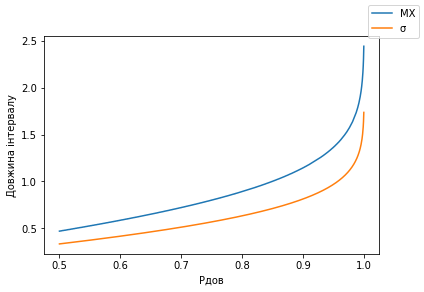

In [10]:
fig, axes = plt.subplots(1,1)

line1, = axes.plot(prob_list_1, abs_list_1)
line2, = axes.plot(prob_list_2, abs_list_2)

axes.set_xlabel("Pдов")
axes.set_ylabel("Довжина інтервалу")

fig.legend((line1, line2), ('MX', 'σ '))

In [11]:
random_samples = []
for n in range(10,len(data)):
    random_sample = np.random.choice(data, n)
    random_samples.append(random_sample)

In [12]:
abs_list_1 = []
count_list_1 = []
for random_sample in random_samples:
    count_list_1.append(len(random_sample))
    l,r = interval_expected_value(random_sample,0.95)
    length = np.abs(l - r)
    abs_list_1.append(length)
# plt.clf()
# plt.plot(count_list, abs_list)
# plt.draw() 

In [13]:
abs_list_2 = []
count_list_2 = []
for random_sample in random_samples:
    count_list_2.append(len(random_sample))
    l,r = interval_standart_deviation(random_sample,0.95)
    length = np.abs(l - r)
    abs_list_2.append(length)
# plt.clf()
# plt.plot(count_list, abs_list)
# plt.draw() 

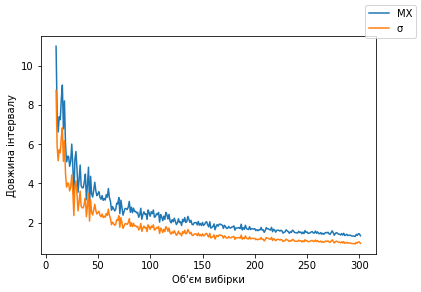

In [14]:
fig, axes = plt.subplots(1,1)

line1, = axes.plot(count_list_1, abs_list_1)
line2, = axes.plot(count_list_2, abs_list_2)

axes.set_xlabel("Об'єм вибірки")
axes.set_ylabel("Довжина інтервалу")

fig.legend((line1, line2), ('MX', 'σ '))

### Додаткове завдання

#### Завантаження, очистка та з'єднання датасетів.

In [15]:
dataframe1 = pd.read_csv('Data3a.csv', delimiter=';', index_col='id')
dataframe1.info()
dataframe2 = pd.read_csv('Data3b.csv', delimiter=';', index_col='id')
dataframe2.info()

df = dataframe1.join(dataframe2, on='id')
df.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 1 to 18249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 1 to 18249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type         18249 non-null  object 
 1   year         18249 non-null  int64  
 2   region       18249 non-null  object 
 3  

#### Створення колонки з загальним прибутком

In [16]:
df['General profit'] = df['AveragePrice'] * df['Total Volume']
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,General profit
id,,,,,,,,,,,,,,
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,27831.9729
18246,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,23748.5484
18247,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,25743.8412


#### Знаходження загального прибутку по органічному та неорганічному авокадо


In [17]:
profit_by_types = df.groupby(by='type').sum()['General profit']
print(f'Profit by organic avocado: {profit_by_types["organic"]} $')
print(f'Profit by conventional avocado: {profit_by_types["conventional"]} $')

Profit by organic avocado: 680608520.8658015 $
Profit by conventional avocado: 16253522446.003998 $


#### Який рік був найбільш успішним

In [18]:
group_profit_by_year = df.groupby(by='year').sum()['General profit']

print(f'Best year: {group_profit_by_year.idxmax()}')

Best year: 2017


#### Три графіки залежності середньої ціни від к-сті різних упаковок

Text(0, 0.5, 'Середня ціна')

<Figure size 432x288 with 0 Axes>

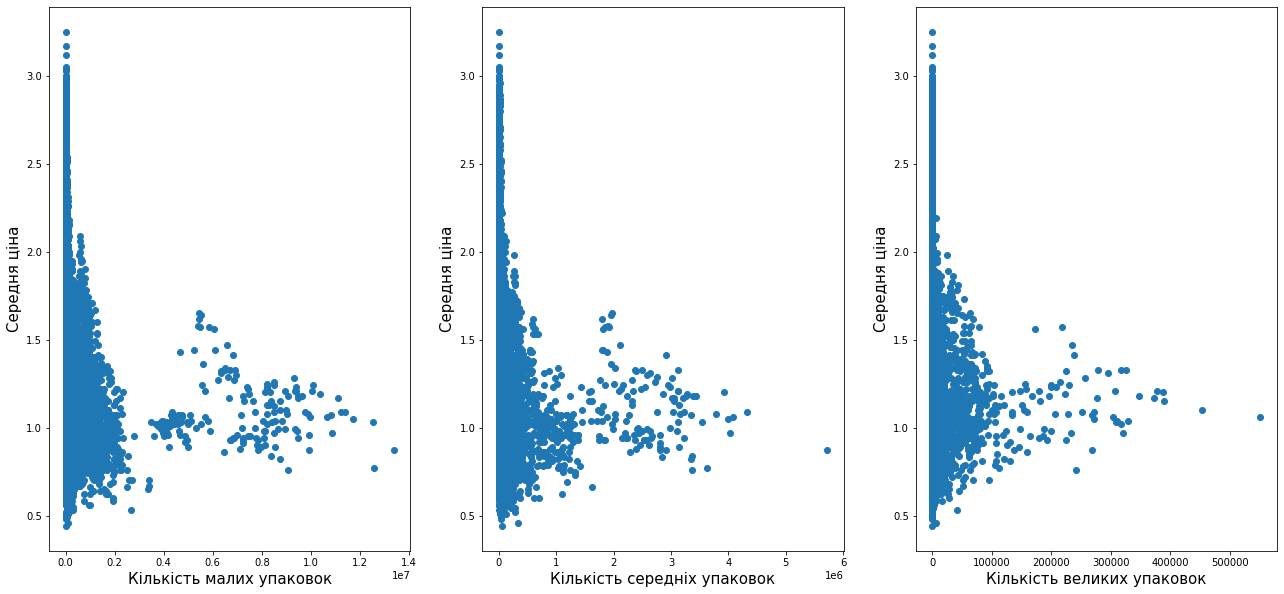

In [19]:
avg_price = df['AveragePrice']
small_bags = df['Small Bags']
large_bags = df['Large Bags']
xlarge_bags = df['XLarge Bags']
plt.clf()

fig, axes = plt.subplots(1,3,figsize=(22,10))

axes[0].scatter(x=small_bags,y=avg_price)
axes[0].set_xlabel('Кількість малих упаковок',fontsize=15)
axes[0].set_ylabel('Середня ціна',fontsize=15)

axes[1].scatter(x=large_bags,y=avg_price)
axes[1].set_xlabel('Кількість середніх упаковок',fontsize=15)
axes[1].set_ylabel('Середня ціна',fontsize=15)

axes[2].scatter(x=xlarge_bags,y=avg_price)
axes[2].set_xlabel('Кількість великих упаковок',fontsize=15)
axes[2].set_ylabel('Середня ціна',fontsize=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x24d8b2ee3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d8b2eea60>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d8b2ee040>],
 'medians': [<matplotlib.lines.Line2D at 0x24d8b2fa160>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d8b2fa4c0>],
 'means': []}

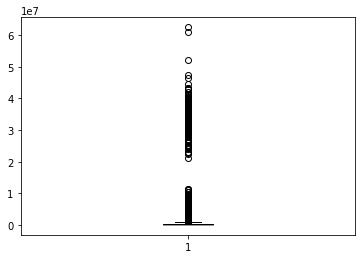

In [20]:
plt.boxplot(df['Total Volume'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24d8b356490>,
 'caps': [<matplotlib.lines.Line2D at 0x24d8b356b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d8b356130>],
 'medians': [<matplotlib.lines.Line2D at 0x24d8b360250>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d8b3605b0>],
 'means': []}

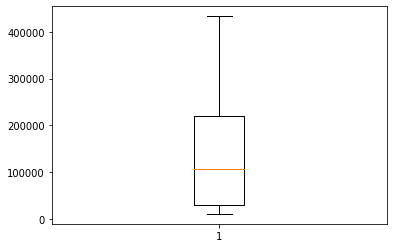

In [21]:
y = df['Total Volume']
t = y.between(y.quantile(0.25),y.quantile(0.75))
plt.boxplot(y[t])

#### Діаграма Pie

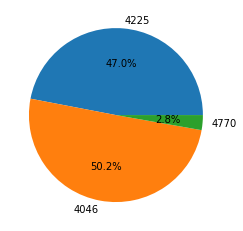

In [22]:
sales_by_year = df.groupby(by='year').sum()
sales_by_4225 = sales_by_year['4225'][2017]
sales_by_4046 = sales_by_year['4046'][2017]
sales_by_4770 = sales_by_year['4770'][2017]
sales_list = np.array([sales_by_4225,sales_by_4046,sales_by_4770])
plt.pie(sales_list, labels=['4225','4046','4770'], autopct='%1.1f%%')
plt.draw()

#### В якому штаті середня ціна за весь час була мінімальною, а в якому максимальною?

In [23]:
average_price_by_states = df.groupby(by='region').mean()
min_price_state = average_price_by_states['AveragePrice'].idxmin()
max_price_state = average_price_by_states['AveragePrice'].idxmax()
print(f'State with min mean price: {min_price_state}')
print(f'State with max mean price: {max_price_state}')

State with min mean price: Houston
State with max mean price: HartfordSpringfield


#### Які регіони схожі по продажам авокадо? Поясніть свою відповідь.

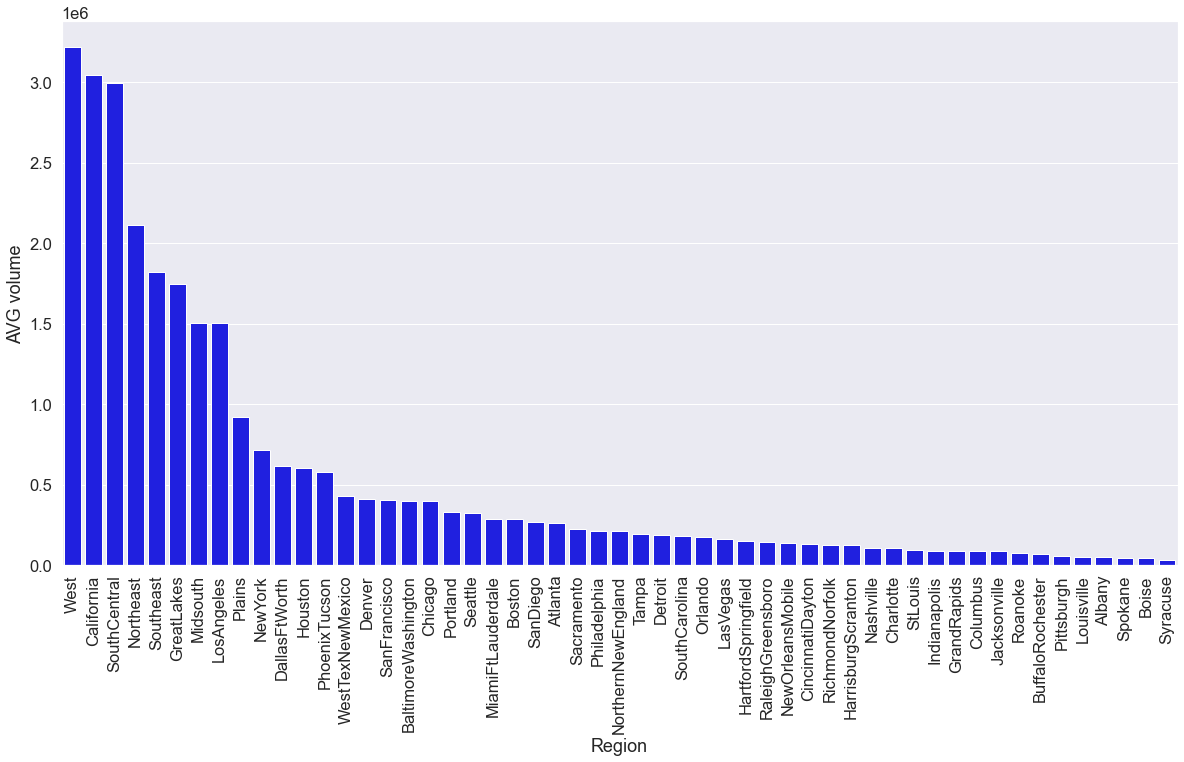

In [24]:
df1 = df[df['region'] != 'TotalUS']

average_volume_by_states = df1.groupby(by='region').mean()['Total Volume']

indexes = average_volume_by_states.index

df2 = pd.DataFrame({"Region":indexes,"AVG volume":average_volume_by_states}).sort_values(by='AVG volume', ascending=False)

sorted_indexes = df2['Region']
sorted_price = df2['AVG volume']
plt.figure(figsize=(20,10))
sn.set(font_scale=1.5)
ax = sn.barplot(x=sorted_indexes,y=sorted_price,capsize=50, color='Blue')
plt.xticks(rotation=90)

plt.draw()